In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [5]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\Customer Churn Advanced\customer_churn.csv")
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,25,Male,12,5,1,0,Basic,Short,200,5,0
1,2,45,Female,24,3,5,2,Premium,Long,900,20,1
2,3,30,Male,6,4,2,1,Basic,Short,300,10,0
3,4,50,Female,36,2,6,3,Premium,Long,1200,30,1
4,5,35,Male,18,6,0,0,Basic,Short,500,15,0


In [7]:
df.drop(columns=['CustomerID'], inplace=True)


In [9]:
label_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,1,12,5,1,0,0,1,200,5,0
1,45,0,24,3,5,2,1,0,900,20,1
2,30,1,6,4,2,1,0,1,300,10,0
3,50,0,36,2,6,3,1,0,1200,30,1
4,35,1,18,6,0,0,0,1,500,15,0


In [11]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
 [[1 1]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



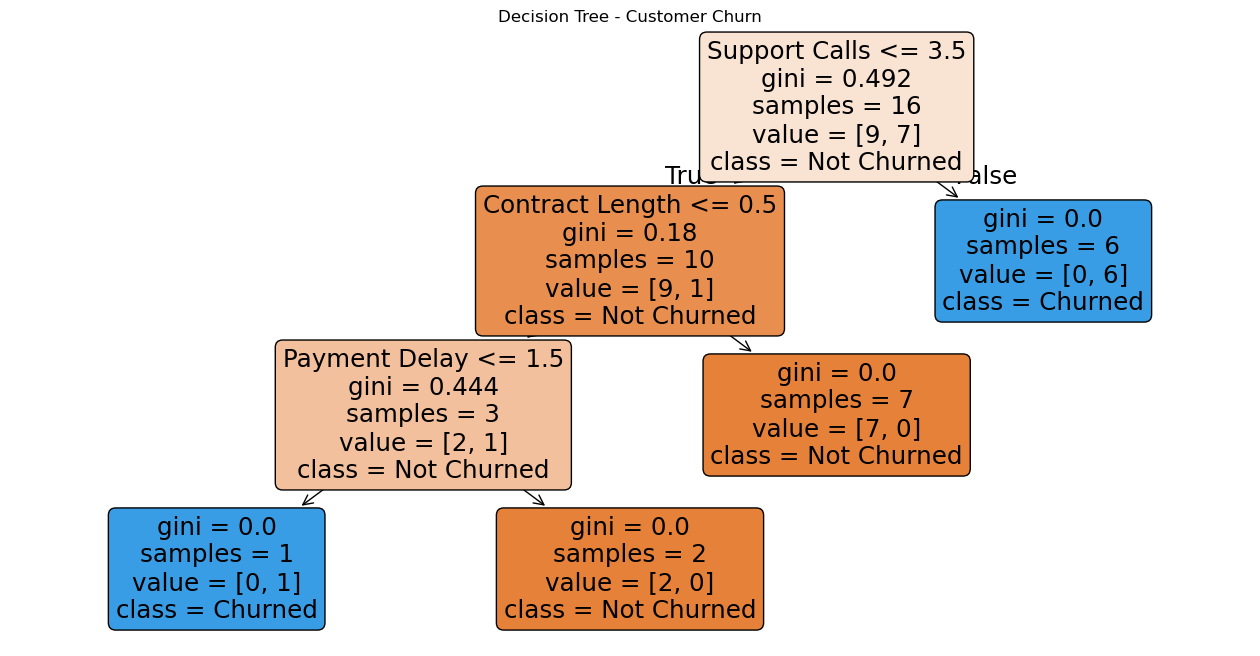

In [17]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True, rounded=True)
plt.title("Decision Tree - Customer Churn")
plt.show()


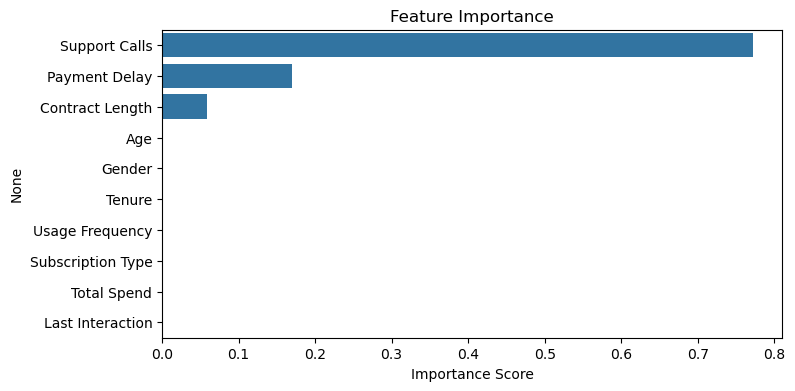

In [18]:
importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=importance, y=importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [19]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pruned_pred = pruned_tree.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pruned_pred))


Pruned Tree Accuracy: 0.75
